In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df

<ipython-input-3-3a164e156250>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/creditcard.csv')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33755,37372,0.597155,-1.457940,0.648770,-1.154721,-1.384692,-0.114190,-0.353940,0.077492,1.434997,...,0.266727,0.391858868587825,-0.248812,0.335329,0.164725,-0.063462,0.010369,0.068737,300.00,0.0
33756,37373,-7.504323,-15.633772,-4.215051,1.507090,-5.412604,3.243205,4.422388,-0.423582,0.392031,...,2.323590,-2.53917289990935,-3.736852,-0.792271,-1.694790,-0.463947,-0.703180,0.780931,4476.72,0.0
33757,37373,1.242547,0.010297,-1.206012,0.083576,2.171891,3.391877,-0.417041,0.793206,-0.149793,...,0.031822,-0.0638428726104072,-0.166334,1.008827,0.824605,-0.268009,0.016069,0.019513,28.56,0.0
33758,37373,-1.065865,1.177477,2.083773,1.296198,0.564073,0.295974,0.656915,0.158767,-1.006866,...,-0.157601,-0.518893364163089,-0.140236,-0.022273,0.117122,-0.358995,-0.201863,0.088919,0.00,0.0


In [ ]:
# Create a new 'text' column by concatenating the values from 'V1' to 'V28'
df['text'] = df[['V' + str(i) for i in range(1, 29)]].astype(str).apply(' '.join, axis=1)

In [ ]:
# Now, proceed with the preprocessing and model training
def preprocess_text(text):
    text = text.lower()  # convert text to lowercase
    # Modified regex to preserve numbers and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove non-alphanumeric characters
    return text

In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
df = df.dropna(subset=['Class'])

In [ ]:
X = df['cleaned_text']
X

,cleaned_text
0,13598071336738 00727811733098497 2536346737969...
1,119185711131486 026615071205963 01664801133532...
2,135835406159823 134016307473609 17732093426311...
3,0966271711572087 0185226008082898 179299333957...
4,115823309349523 0877736754848451 1548717846511...
...,...
33754,144438543282652 118017060725067 03549929036970...
33755,059715476599688 145794026978686 06487697407553...
33756,750432315860846 156337715288914 42150513869813...
33757,124254715717259 00102971545545286 120601232160...


In [ ]:
y = df['Class']
y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
33754,0.0
33755,0.0
33756,0.0
33757,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_impurity_decrease=0.02)

In [ ]:
dt_model = dt.fit(X_train_tfidf, y_train)

In [ ]:
predictions = dt_model.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, predictions) # Use accuracy_score from sklearn.metrics
print(f"Decision Tree Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.9964


In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 0.9964454976303317
Confusion Matrix: 
[[6728    0]
 [  24    0]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.00      0.00      0.00        24

    accuracy                           1.00      6752
   macro avg       0.50      0.50      0.50      6752
weighted avg       0.99      1.00      0.99      6752



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


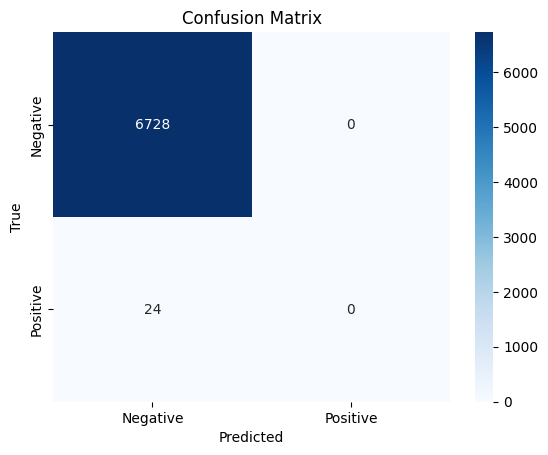

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()